# CPSC222 Final Project - Analyzing Spotify Data

CPSC 223 Section 01

12/13/2022

Sam Hopper, Manny Uzoma

Within this project, we are going to be analyzing the diferences in our spotify datasets. Moreover, we are going to attempt to train a machine learning model to predict the differences in our listening history.

## Introduction
1. The domain we are researching is a Spotify dataset.
1. We colleced CSV files of the data from Spotify.
1. Tables
    * Data was automatically collected using the Spotify Developer portal.
    * Each table has 4 instances, a date, artist name, track name, and miliseconds played.
1. Attributes:
    * "endTime": cardinal date and time in string
    * "artistName": the name of the artist in string format
    * "trackName": name of the track as a string
    * "msPlayed": amount of time played (in miliseconds) as a integer for each song
1. We are classifying the artist name and the miliseconds played in the dataset.
1. The primary potential impact on our results is us, being the stakeholders, as we will be demonstrating the resources learned from class in real world applications.

## Data Analysis
1. Cleaning was minimal as there were no missing values within this dataset: 
    * The most cleaning necessary was converting the Spotify raw json file to CSV format. 
    * Moreover, we had to convert miliseconds to minutes.
2. Data preperation and aggregation, had to search and group artist names to the respective miliseconds played.


We begin by creating the dataframes and importing the necessary libraries needed. Primarily, we will use [pandas](https://pandas.pydata.org/) to begin sorting our data into a dataframe object.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("project_midterm_part.csv")
artist_name_df = df.groupby("artistName")

manny_df = pd.read_csv("StreamingHistory1.csv")
manny_artist_name_df = manny_df.groupby("artistName")

#### Beginning Visualizations - Aggregating the dataset

Grouping through each of our five chosen artists and splitting into series to obtain the sums of each.

In [2]:
artist_df = artist_name_df.get_group("Kanye West")
artist_ser = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Kanye West")
artist_ser11 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Mac Miller")
artist_ser2 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Mac Miller")
artist_ser22 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Drake")
artist_ser3 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Drake")
artist_ser33 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("SZA")
artist_ser4 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("SZA")
artist_ser44 = manny_df1["msPlayed"]

artist_df = artist_name_df.get_group("Billie Eilish")
artist_ser5 = artist_df["msPlayed"]
manny_df1 = manny_artist_name_df.get_group("Billie Eilish")
artist_ser55 = manny_df1["msPlayed"]

Beginning of visualization by identifying each Manny and I's X and Y plot labels and additionally creating the sum of the series for each to find the total amount of time listened for each artist. Moreover, I have a loop that intuitively goes through each instance of the series, which were in miliseconds and now minutes by dividing by 60,000.

In [3]:
x = ["Kanye West", "Mac Miller", "Drake", "SZA", "Billie Eilish"]
y = [int(artist_ser.sum()), int(artist_ser2.sum()), int(artist_ser3.sum()), int(artist_ser4.sum()), int(artist_ser5.sum())]

x1 = ["Kanye West", "Mac Miller", "Drake", "SZA", "Billie Eilish"]
y1 = [int(artist_ser11.sum()), int(artist_ser22.sum()), int(artist_ser33.sum()), int(artist_ser44.sum()), int(artist_ser55.sum())]

# finding the mean amount of time listened
mean_listening_time_ser = df.iloc[:,3]
test_statistic = mean_listening_time_ser.mean() / 60000

#print(y[0])
for i in range(len(y)):
    #print(i)
    y[i] = y[i] / 60000
    y1[i] = y1[i] / 60000

"""
for i in y:
    print(i)
"""

'\nfor i in y:\n    print(i)\n'

### Visualization of Sam Spotify listening history dataset

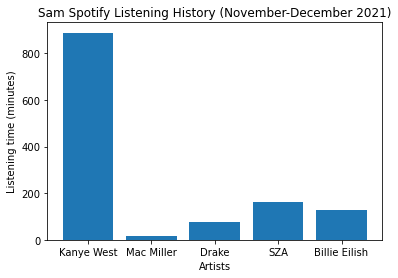

In [4]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Sam Spotify Listening History (November-December 2021)")
plt.bar(x,y)
plt.show()

#### Visualization of Manny Spotify listening history dataset

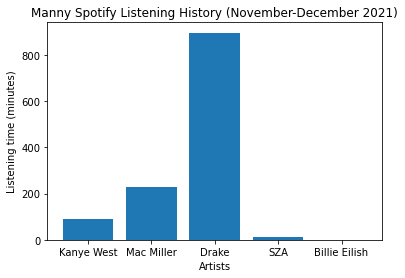

In [5]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Manny Spotify Listening History (November-December 2021)")
plt.bar(x1, y1)
plt.show()

### Visualization of both datasets

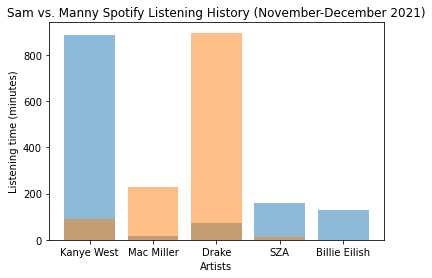

In [6]:
plt.ylabel("Listening time (minutes)")
plt.xlabel("Artists")
plt.title("Sam vs. Manny Spotify Listening History (November-December 2021)")
plt.bar(x, y, alpha=0.5)
plt.bar(x1, y1, alpha=0.5)
plt.show()

* Primary takeaways forom this graph: I listen to significantly more Kanye West than Manny listens to Drake. But we can test this using hypothesis testing:

### One Sample, One-tailed test for Sam's Spotify Data

#### Null and alternative hypothesis:

$H_0$: $\mu \le \mu _2$



$H_1$: $\mu > \mu _2$

#### Level of significance:

$\alpha = 0.05$ 

#### Appropriate test statistic:

$t = \frac{\overline{x} - \mu}{s / \sqrt(n)}$

### Formulate decision rule:

* If t-computed is > 1.708, then reject $H_0$

* If t-computed is <= 1.708, then Do Not Reject $H_0$

In [7]:
t_computed, p_val = stats.ttest_1samp(y, test_statistic)

p_val /= 2 # because one tailed
print(t_computed, p_val)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

1.5719509956625912 0.09553112160365758
DO NOT reject H0


We can see that the p-value for this test is 0.9, which means it is a close p-value to the original target. Moreover, we have a positive t-computed value which states that the mean of the sample taken is greater than the mean of the hypothesized population. However, since the null hypothesis is rejected, there isn't evidence that supports there is more time listening to my entire library than my favorite artists.

An interesting observation about this is that we can notice that I enjoy listening to my favorite artists or songs in contrast to exploring various artists.

### One Sample, One-tailed test for Manny's Spotify Data

#### Null and alternative hypothesis:

$H_0$: $\mu \le \mu _2$

$H_1$: $\mu > \mu _2$

#### Level of significance:

$\alpha = 0.05$ 

#### Appropriate test statistic:

$t = \frac{\overline{x} - \mu}{s / \sqrt(n)}$

### Formulate decision rule:

* If t-computed is > 1.708, then reject $H_0$

* If t-computed is <= 1.708, then Do Not Reject $H_0$

In [8]:
t_computed, p_val = stats.ttest_1samp(y1, test_statistic)

p_val /= 2 # because one tailed
print(t_computed, p_val)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")


1.4534198984552864 0.10988625487260933
DO NOT reject H0


With also a high p-value, this suggests that I listen to one artist more than other artists.

### Two Independent Samples, One-tailed test

#### Null and alternative hypothesis:

$H_0$: $\mu_1 \le \mu _2$

$H_1$: $\mu_1 > \mu _2$

#### Level of significance:

$\alpha = 0.05$ 

#### Appropriate test statistic:

$t = \frac{\overline{x} - \mu}{s / \sqrt(n)}$

### Formulate decision rule:

* If t-computed is > 1.960, then reject $H_0$

* If t-computed is <= 1.960, then Do Not Reject $H_0$

In [9]:
t, pval = stats.ttest_ind(y, y1)
# when performing a one tailed test, you need to divide the pval by 2
pval /= 2
print(t, pval)
alpha = 0.05
if p_val < alpha:
    print("reject H0")
else:
    print("DO NOT reject H0")

0.0360858632806366 0.48604903818997225
DO NOT reject H0


With a p-value of 0,4. it represents not a high correlation between each listening time for our favorite artists, implying that Sam listens to more music than I do.

## Classification Results
* Decision Tree Evaluation
    * Visualization
* kNN (k-Nearest Neighbors) algorithm & accuracy score

#### Decision Tree Evaluations

We can begin looking at classifying our results using decision trees. Decision trees are a type of supervised learning algorithm, meaning that they can be trained on labeled data to make predictions about new and unseen data. Decision trees are easy to understand, interpret, and visualize, which makes them a popular choice for many applications in fields such as data science.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

model = preprocessing.LabelEncoder()
df["artistName"] = model.fit_transform(df["artistName"])
manny_df["artistName"] = model.fit_transform(manny_df["artistName"])

df.fillna("")
manny_df.fillna("")

y_model = df.drop(["endTime", "trackName"], axis=1)
x_model = manny_df.drop(["endTime", "trackName"], axis=1)

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(x_model, y_model)

DecisionTreeClassifier(max_depth=3, random_state=0)

#### Decision Tree Visualization

[Text(0.5, 0.875, '51 <= 935.5\ngini = 0.985\nsamples = 7901\nvalue = [[11, 1, 1 ... 0, 0, 0]\n[196, 4, 3 ... 1, 7, 1]]'),
 Text(0.25, 0.625, '51 <= 455.5\ngini = 0.984\nsamples = 5969\nvalue = [[8, 0, 1 ... 0, 0, 0]\n[143, 4, 2 ... 1, 6, 1]]'),
 Text(0.125, 0.375, '51 <= 152.5\ngini = 0.983\nsamples = 3331\nvalue = [[5, 0, 0 ... 0, 0, 0]\n[72, 3, 0 ... 0, 4, 0]]'),
 Text(0.0625, 0.125, 'gini = 0.987\nsamples = 887\nvalue = [[2, 0, 0 ... 0, 0, 0]\n[19, 1, 0 ... 0, 2, 0]]'),
 Text(0.1875, 0.125, 'gini = 0.981\nsamples = 2444\nvalue = [[3, 0, 0 ... 0, 0, 0]\n[53, 2, 0 ... 0, 2, 0]]'),
 Text(0.375, 0.375, '51 <= 932.5\ngini = 0.985\nsamples = 2638\nvalue = [[3, 0, 1 ... 0, 0, 0]\n[71, 1, 2 ... 1, 2, 1]]'),
 Text(0.3125, 0.125, 'gini = 0.986\nsamples = 2599\nvalue = [[3, 0, 1 ... 0, 0, 0]\n[69, 1, 2 ... 1, 2, 1]]'),
 Text(0.4375, 0.125, 'gini = 0.907\nsamples = 39\nvalue = [[0, 0, 0 ... 0, 0, 0]\n[2, 0, 0 ... 0, 0, 0]]'),
 Text(0.75, 0.625, '51 <= 943.5\ngini = 0.985\nsamples = 1932\nvalue

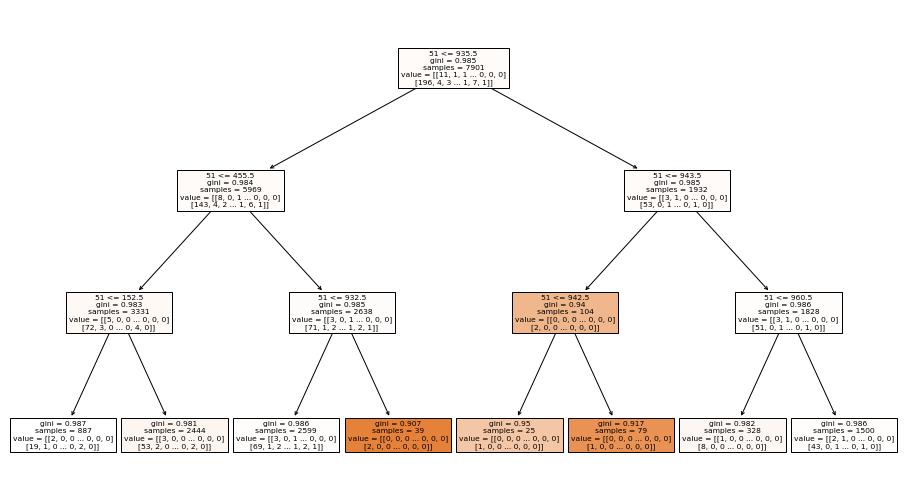

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(tree, feature_names=x_model.iloc[1], class_names={1: "survived", 0: "died"}, filled=True)

From this visualiation, we find that I listen to more various artists than Sam does, as there are more sections that are highlighted with higher values. This is also confirmed by the t-test evaluation.

### KNN Predictions

For this part of the project, we evaluated the [kNN (kNearestNeighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to create an accuracy test for the value of the possible unseen data. The number of neighbors, k, is a parameter that can be chosen by the algorithm. A larger k can lead to a smoother decision boundary, but a smaller k can be more sensitive to noise in the training data. The kNN algorithm is used by the sklearn library.

The parameters for our test will be:
* `random_state = 42`
* Reserve 33% of the testing data

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

X_train, X_test, y_train, y_test = train_test_split(x_model, y_model, random_state = 42, test_size=0.33)
print(X_test, y_test)
scalar = MinMaxScaler()
scalar.fit(X_train)


X_train_normalized = scalar.transform(X_train)
print(X_train_normalized)
X_test_normalized = scalar.transform(X_test)
print(X_test_normalized)


knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
classifier = MultiOutputClassifier(knn_clf, n_jobs=1)
classifier.fit(X_train_normalized, y_train)

#knn_clf.fit(X_train_normalized,  y_train)
y_predicted = classifier.predict(X_test_normalized)


#print("y predicted:", y_predicted)
# print("nearest neighbors:", knn_clf.kneighbors(X_test_normalized))

#acc = knn_clf.score(X_test_normalized, y_test)
acc = classifier.score(X_test_normalized, y_predicted)
print("accuracy:", acc)

      artistName  msPlayed
4913         281    259560
4900         499    256800
2301         976    274325
6953         426    164571
3528         562    198109
...          ...       ...
307          766     10239
1278         149    139889
4518         198    185306
7704         811    330237
6156          61    196235

[2608 rows x 2 columns]       artistName  msPlayed
4913         136    469275
4900         182      1490
2301          25    169560
6953         464    173536
3528         371      1173
...          ...       ...
307          447     63936
1278         477      3920
4518          73     10080
7704         209    120047
6156         295     37034

[2608 rows x 2 columns]
[[0.24876847 0.04568019]
 [0.78407225 0.02571761]
 [0.11740558 0.02453271]
 ...
 [0.33908046 0.00176324]
 [0.49425287 0.0064815 ]
 [0.16009852 0.03023437]]
[[0.23070608 0.05267185]
 [0.40968801 0.05211177]
 [0.80131363 0.05566808]
 ...
 [0.16256158 0.03760368]
 [0.66584565 0.06701416]
 [0.0500821  0.0

An accuracy score of 1.0 is very high and means that the kNN closely follows the training data, and not having any unseen instances.

### Conclusion

From these statistical tests, we can find interesting conclusions from each of these tests. Firstly, we found that my most listened to artist was Kanye, while Manny's was Drake. However, Manny had a more spread out listening pattern by listening to various artists, and I paid more attention to the artists that were my favorite. This was demonstrated by the individual one tailed and one sampled tests. This is where my p-value is 0.9, which is close to the total value, while Manny's is estimated to be 1.0. 

We also tested the correlation of how much music Manny and I both listen to, where the result came to be a low correlation with a p-value of 0.48. Additionally, the accuracy score by the kNN (k-Nearest Neighbors) test was suprising very high being 1.0 supporting that the model closely followed the training data. In conclusion, we were able to determine the correlation of both of our music listening history by analyzing Spotify data and using real world examples.

#### Ethical Considerations
Ethical considerations related to collecting user Spotify data include issues of privacy, consent, and transparency. It is important that users are aware of what data is being collected and how it will be used, and that they have the option to opt out if they so choose. Additionally, the collected data should be handled securely and responsibly, with proper safeguards in place to prevent unauthorized access or misuse. It is also important to consider the potential impact on users and their personal data, and to take steps to minimize any negative consequences.